https://github.com/neowizard2018/neowizard/tree/master/DeepLearningProject

# 모델 다운로드 및 살펴보기

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 613.0/613.0 kB 7.6 MB/s eta 0:00:00


In [ ]:
import ultralytics

In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')  # yolo8n 모델 다운로드

100%|██████████| 6.23M/6.23M [00:00<00:00, 72.2MB/s]


In [ ]:
print(type(model.names))

print(len(model.names))

print(model.names)

<class 'dict'>
80
{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell p

# test1.jpg 테스트

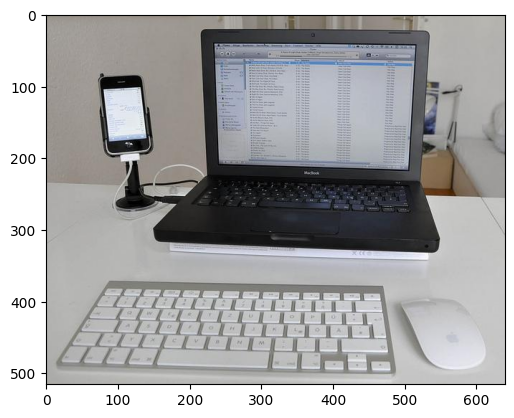

In [ ]:
# 이미지 보여주기
import matplotlib.pyplot as plt

image = plt.imread('/content/test1.jpg') # 그림 불러오기(이미지를 numpy 배열로)
plt.imshow(image) # imshow() : 숫자 배열을 이미지로 출력

plt.show()

In [ ]:
# 이미지 인식 가능한 경우
results = model.predict(source='/content/test1.jpg', save=True)


image 1/1 /content/test1.jpg: 544x640 1 laptop, 1 mouse, 2 keyboards, 1 cell phone, 10.8ms
Speed: 5.6ms preprocess, 10.8ms inference, 1.5ms postprocess per image at shape (1, 3, 544, 640)
Results saved to runs/detect/predict


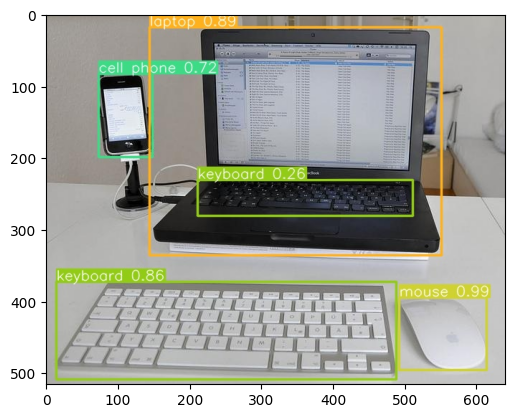

In [ ]:
# 예측한 그림은 /content/runs/detect/predict/ 디렉토리에 저장됨.
import matplotlib.pyplot as plt

image = plt.imread('/content/runs/detect/predict/test1.jpg') # 그림 불러오기
plt.imshow(image)

plt.show()

In [ ]:
print(type(results))
print(results)

In [ ]:
results[0].boxes

# cls : class 번호
# conf : 예측한 정확도
# data : ???
# xywh : x, y 좌표, 가로 세로 크기
# xywhn : xywh를 1이하의 숫자로
# xyxy : 두 좌표
# xyxyn : xyxy 숫자로



```
boxes = result.boxes.xyxy.to('cpu').numpy().astype(int)
confidences = result.boxes.conf.to('cpu').numpy().astype(float)
labels = result.boxes.cls.to('cpu').numpy().astype(int)
```



In [ ]:
# 더 알아 볼 것...
boxes = results[0].boxes.xyxy.to('cpu').numpy().astype(int)       # boxes[0]
confidences = results[0].boxes.conf.to('cpu').numpy().astype(float)
labels = result[0].boxes.cls.to('cpu').numpy().astype(int)        # cls : class?

print(boxes)
print(confidences)
print(labels)

In [ ]:
# 더 알아 볼 것...
import numpy as np

for result in results:  # 아마 그림이 여러장일 경우 1번그림은 results[0], 2번 그림은 result[1] 이런 게 아닐까???
    for c in result.boxes.cls:   # 각 그림 1장 마다...
        print('class num =', int(c), ', class_name =', model.names[int(c)])

class num = 64 , class_name = mouse
class num = 63 , class_name = laptop
class num = 66 , class_name = keyboard
class num = 67 , class_name = cell phone
class num = 66 , class_name = keyboard


# test2.jpg 테스트

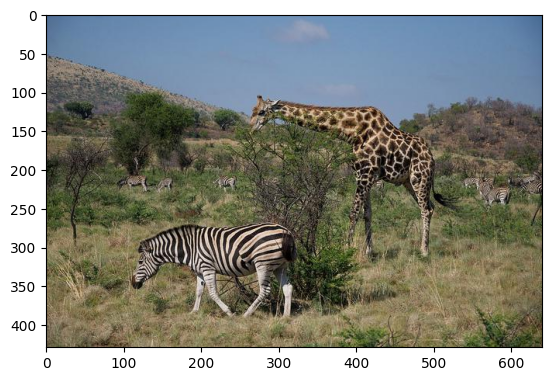

In [ ]:
import matplotlib.pyplot as plt

image = plt.imread('/content/test2.jpg') # 그림 불러오기
plt.imshow(image)

plt.show()

In [ ]:
# 이미지 인식
results = model.predict(source='/content/test2.jpg', save=True)


image 1/1 /content/test2.jpg: 448x640 4 zebras, 1 giraffe, 25.1ms
Speed: 6.7ms preprocess, 25.1ms inference, 2.2ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict


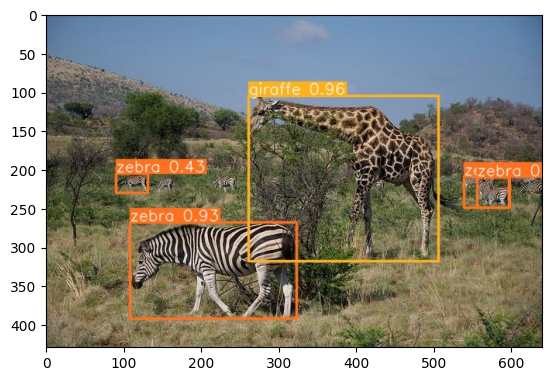

In [ ]:
import matplotlib.pyplot as plt

image = plt.imread('/content/runs/detect/predict/test2.jpg') # 그림 불러오기
plt.imshow(image)

plt.show()

In [ ]:
import numpy as np

for result in results:
    for c in result.boxes.cls:
        print('class num =', int(c), ', class_name =', model.names[int(c)])

class num = 23 , class_name = giraffe
class num = 22 , class_name = zebra
class num = 22 , class_name = zebra
class num = 22 , class_name = zebra
class num = 22 , class_name = zebra


# 알약 이미지 인식

In [ ]:
import matplotlib.pyplot as plt

image = plt.imread('/content/K-038723_0_0_0_0_60_000_200.png') # 그림 불러오기
plt.imshow(image)

plt.show()

SyntaxError: ignored

In [ ]:
# 이미지 인식
results = model.predict(source='/content/K-038723_0_0_0_0_60_000_200.png', save=True)


image 1/1 /content/K-038723_0_0_0_0_60_000_200.png: 640x640 (no detections), 15.4ms
Speed: 5.5ms preprocess, 15.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


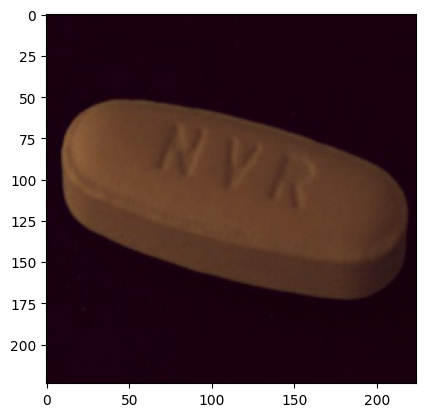

In [ ]:
import matplotlib.pyplot as plt

image = plt.imread('/content/runs/detect/predict/K-038723_0_0_0_0_60_000_200.png') # 그림 불러오기
plt.imshow(image)

plt.show()

In [ ]:
import numpy as np

for result in results:
    for c in result.boxes.cls:
        print('class num =', int(c), ', class_name =', model.names[int(c)])